<a href="https://colab.research.google.com/github/dulhara79/UCI_Adult_Income_Dataset-EDA/blob/main/UCI_Adult_Income_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ================================================================
# IMPORT LIBRARIES
# ================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Display settings
pd.set_option('display.max_columns', 50)
sns.set(style='whitegrid')

In [2]:
# ================================================================
# LOAD THE DIRTY DATASET
# ================================================================
# UCI Adult Income Dataset (Dirty Version)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Adding proper column names based on the documentation
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

# Load using regex separator (due to inconsistent spacing)
df = pd.read_csv(url, names=column_names, sep=r',\s*', engine='python')

print("Raw Dataset Loaded")
print("Shape:", df.shape)
df.head()

Raw Dataset Loaded
Shape: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [5]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


/tmp/ipython-input-6-110866080.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)



Missing Values per Column:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


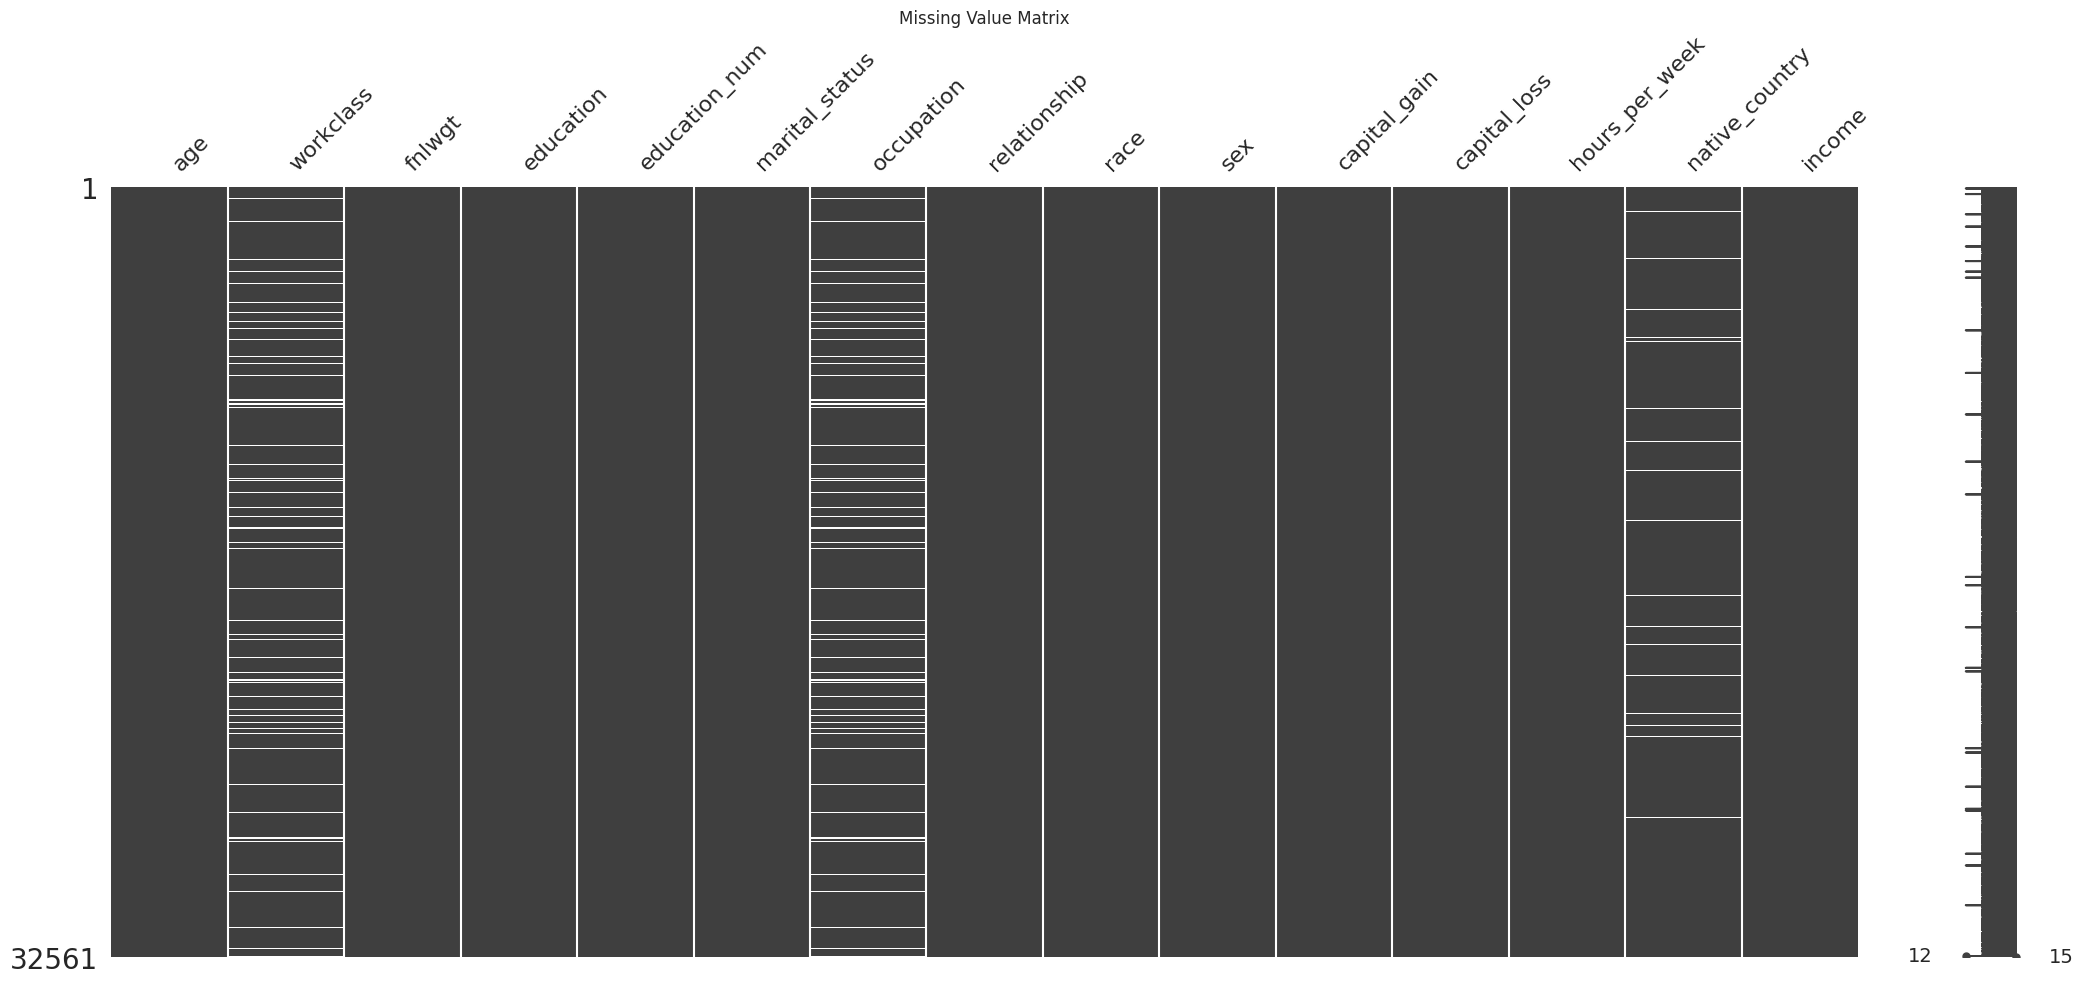

Removed rows with missing values. New shape: (30162, 15)


In [6]:
# ================================================================
# STEP 1: CLEANING & INITIAL EXPLORATION
# ================================================================
# Strip spaces and handle inconsistent formats
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Show missing value summary
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Visualize missingness
msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()

# Drop rows with any missing values (can be replaced with imputation)
df.dropna(inplace=True)
print("Removed rows with missing values. New shape:", df.shape)

In [7]:
# ================================================================
# STEP 2: DATA TYPES & UNIQUE VALUES
# ================================================================
print("\nData Types:\n", df.dtypes)
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].nunique()} unique values")


Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Unique values in categorical columns:
workclass: 7 unique values
education: 16 unique values
marital_status: 7 unique values
occupation: 14 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native_country: 41 unique values
income: 2 unique values


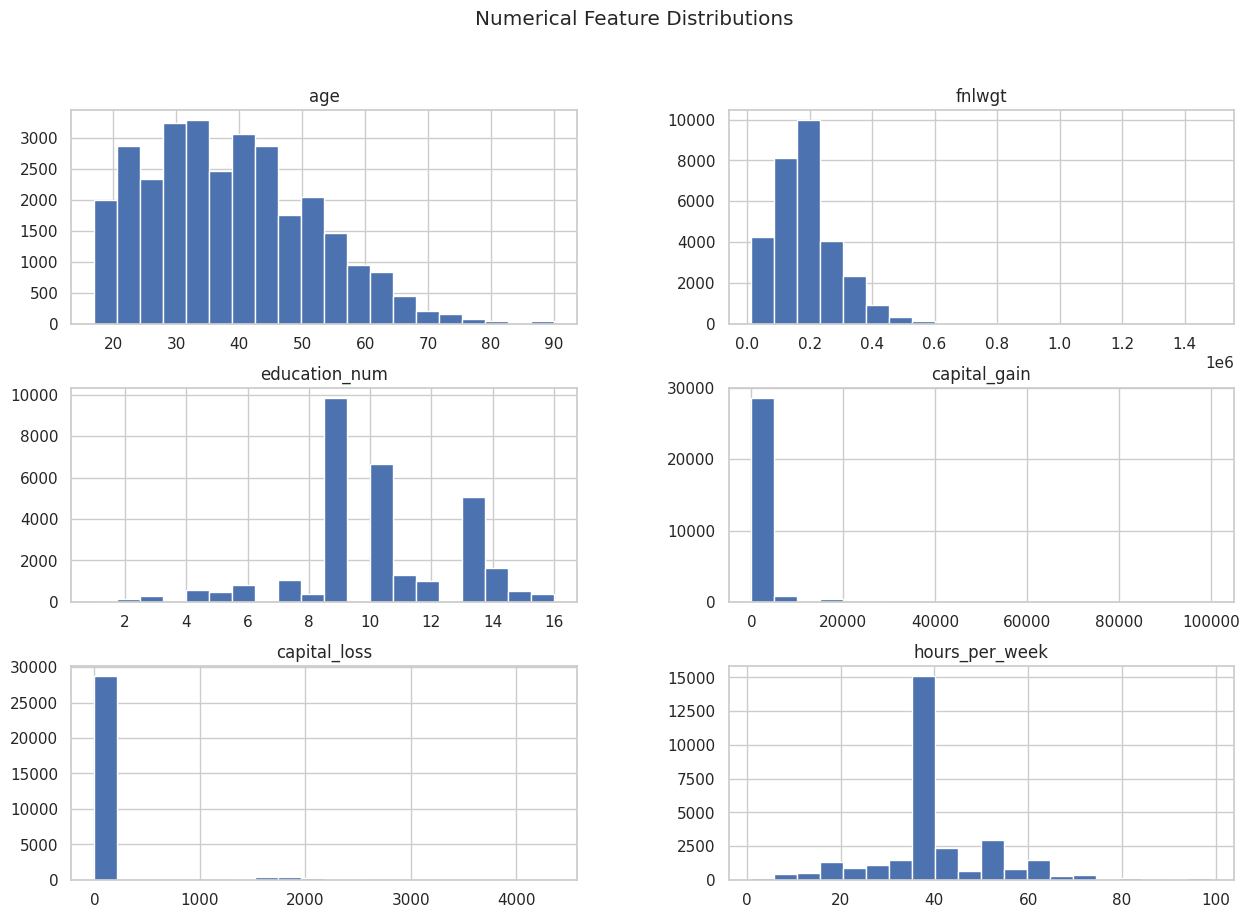

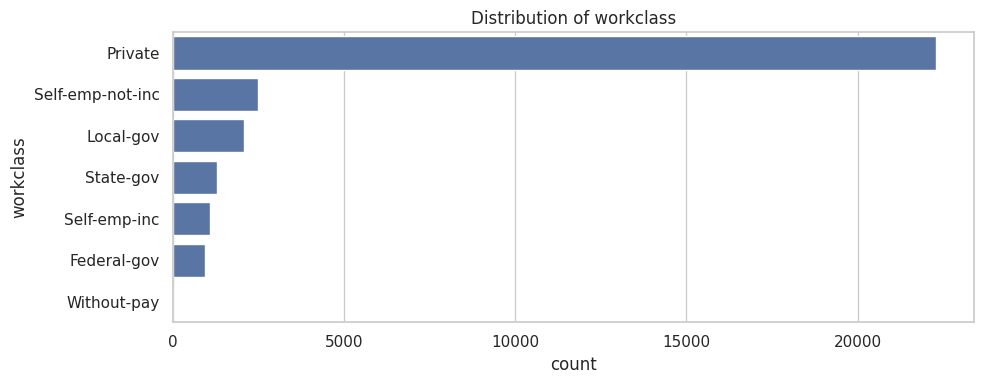

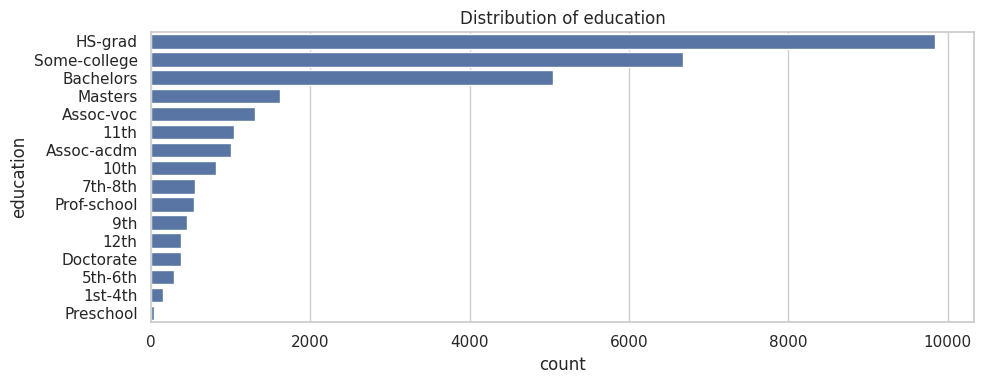

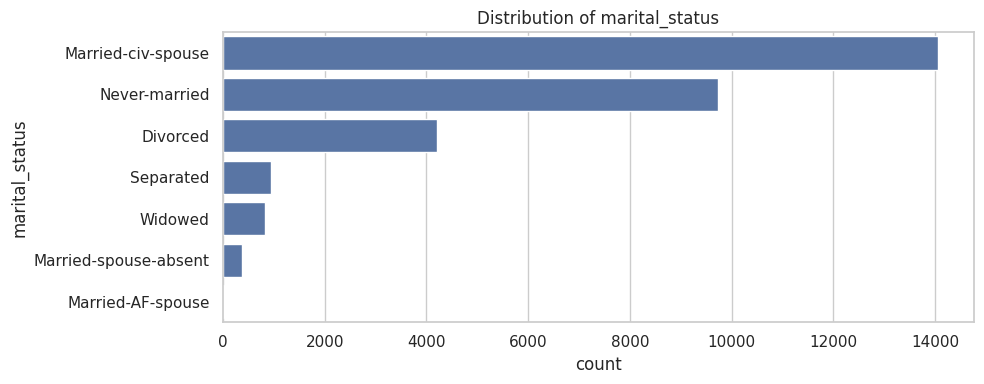

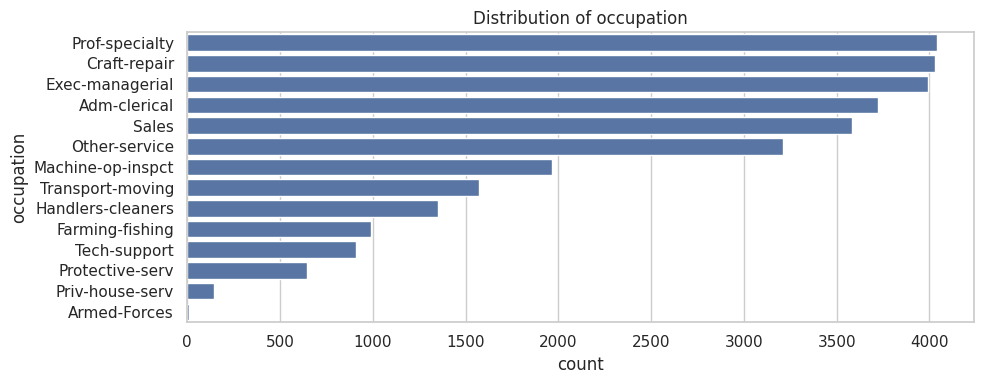

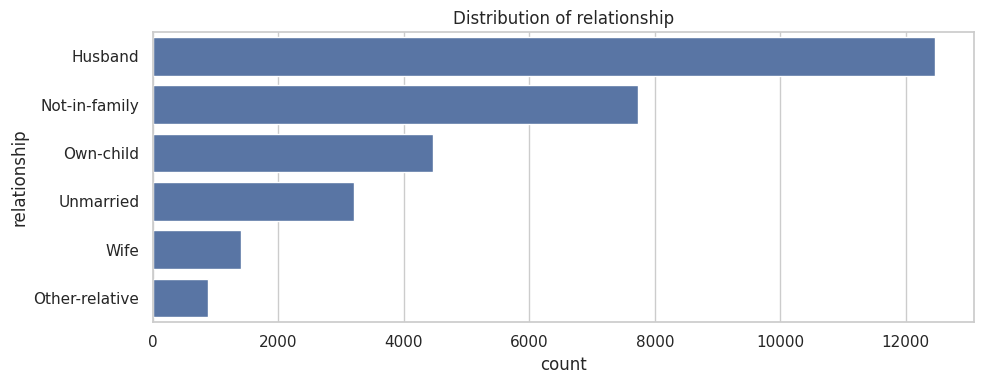

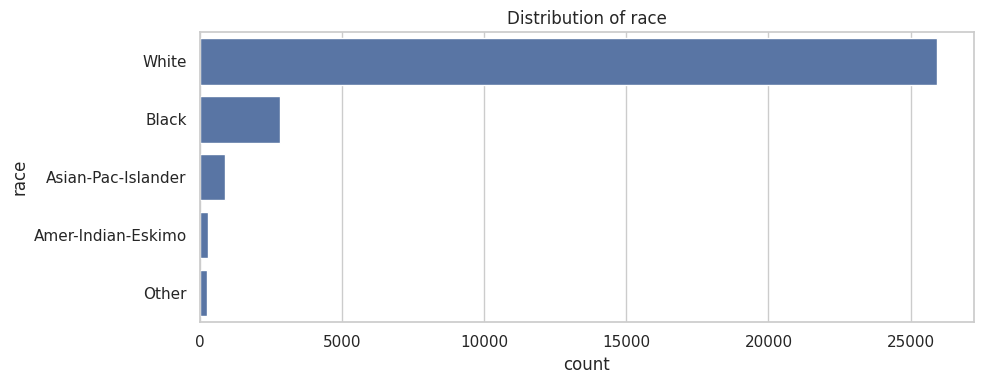

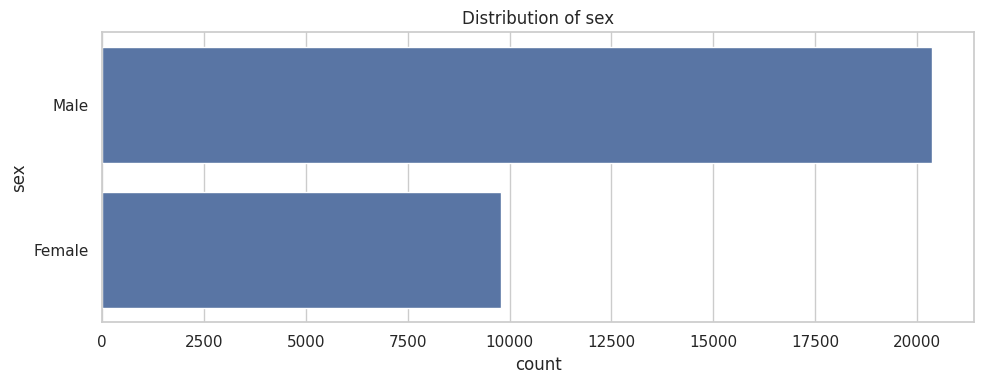

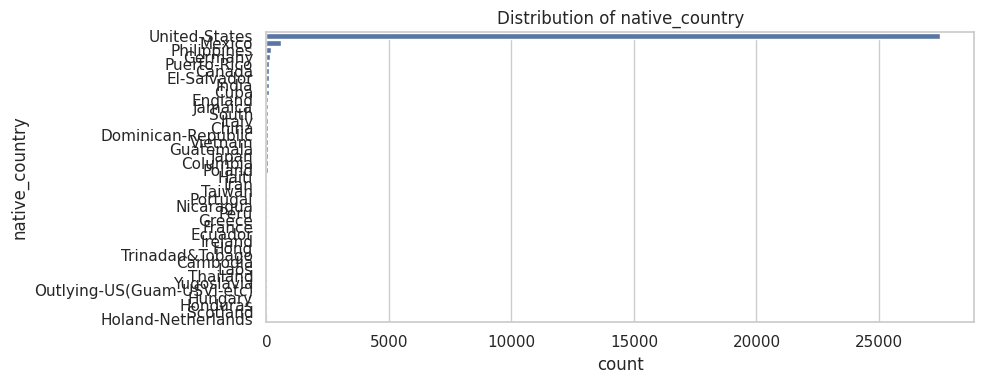

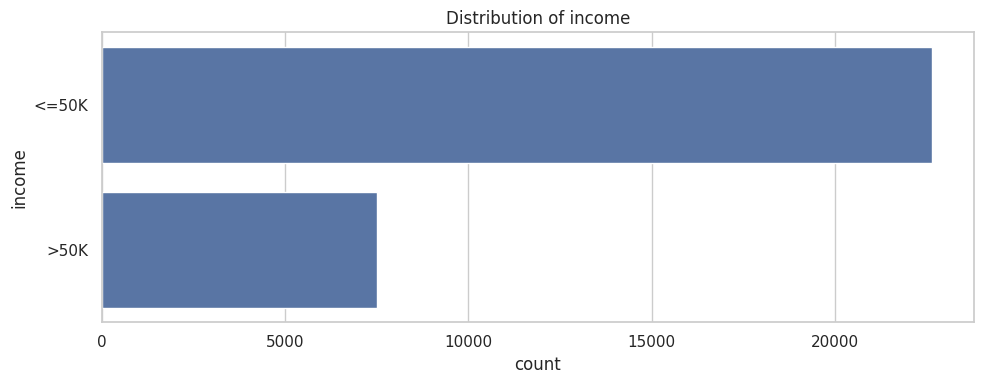

In [8]:
# ================================================================
# STEP 3: UNIVARIATE ANALYSIS
# ================================================================
# Histograms for numerical features
df.select_dtypes(include='number').hist(figsize=(15, 10), bins=20)
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Bar plots for categorical features
for col in df.select_dtypes(include='object'):
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [9]:
# ================================================================
# STEP 4: FEATURE ENGINEERING
# ================================================================
# Create new binary feature for high capital gain
df['has_capital_gain'] = df['capital_gain'].apply(lambda x: 1 if x > 0 else 0)

# Create income binary (0 = <=50K, 1 = >50K)
df['income_binary'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Encode education levels to ordered category
edu_order = {
    'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3,
    '9th': 4, '10th': 5, '11th': 6, '12th': 7, 'HS-grad': 8,
    'Some-college': 9, 'Assoc-voc': 10, 'Assoc-acdm': 11,
    'Bachelors': 12, 'Masters': 13, 'Prof-school': 14, 'Doctorate': 15
}
df['education_rank'] = df['education'].map(edu_order)

In [10]:
# ================================================================
# STEP 5: LABEL ENCODING FOR MODELING/CORRELATION
# ================================================================
le = LabelEncoder()
df_encoded = df.copy()
for col in df.select_dtypes(include='object'):
    df_encoded[col] = le.fit_transform(df[col])

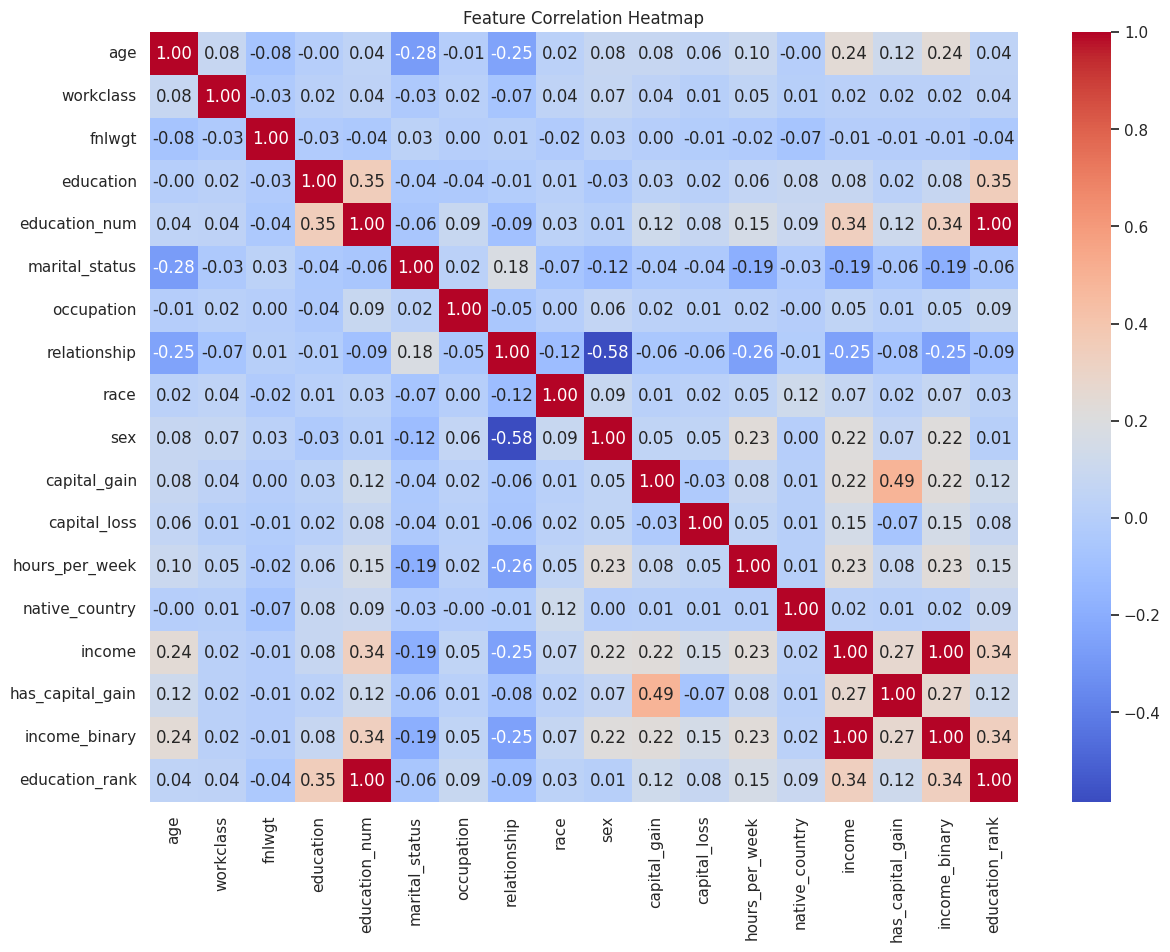

In [11]:
# ================================================================
# STEP 6: CORRELATION ANALYSIS
# ================================================================
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

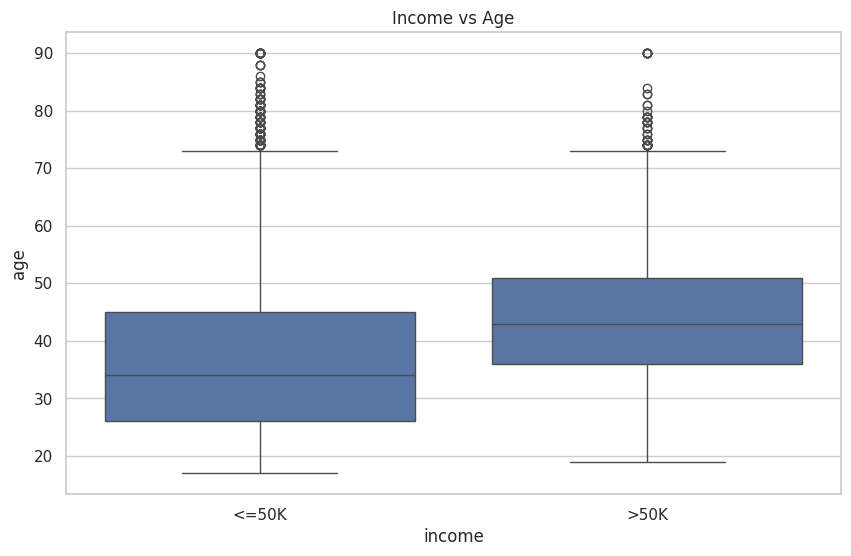

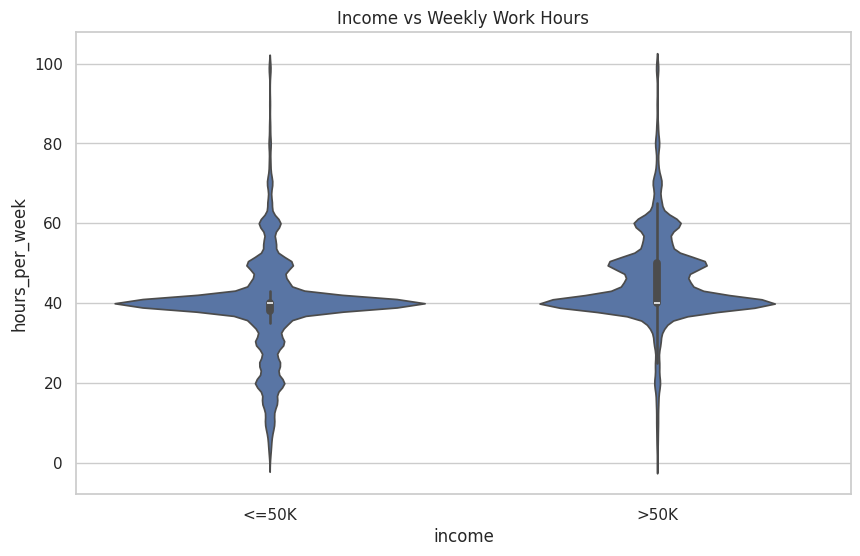

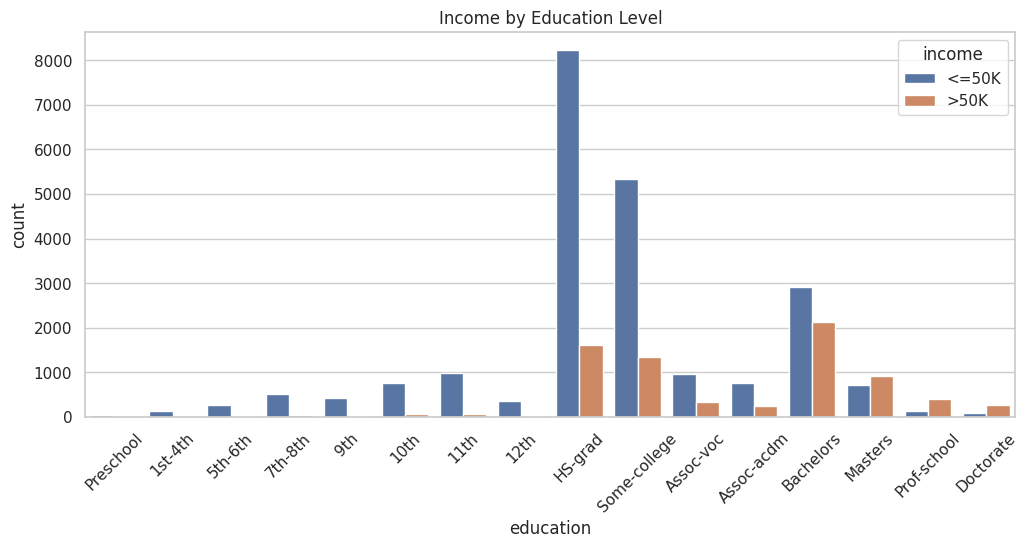

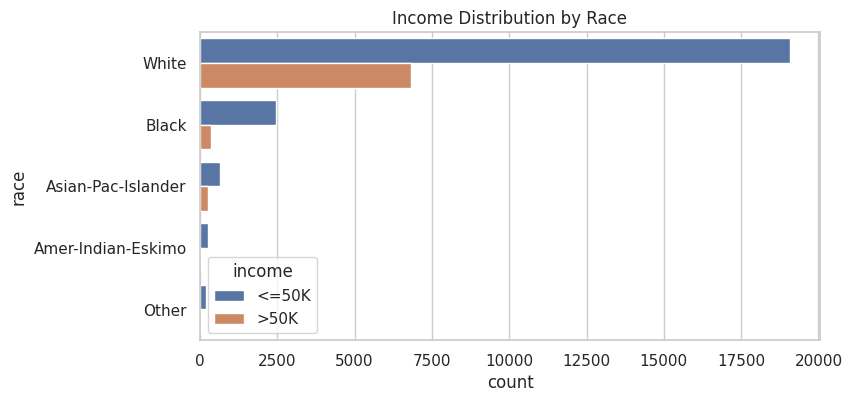

In [12]:
# ================================================================
# STEP 7: BIVARIATE ANALYSIS (TARGET vs FEATURES)
# ================================================================
plt.figure(figsize=(10, 6))
sns.boxplot(x="income", y="age", data=df)
plt.title("Income vs Age")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="income", y="hours_per_week", data=df)
plt.title("Income vs Weekly Work Hours")
plt.show()

# Education level vs Income
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="education", hue="income", order=edu_order.keys())
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

# Race vs Income
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y="race", hue="income")
plt.title("Income Distribution by Race")
plt.show()

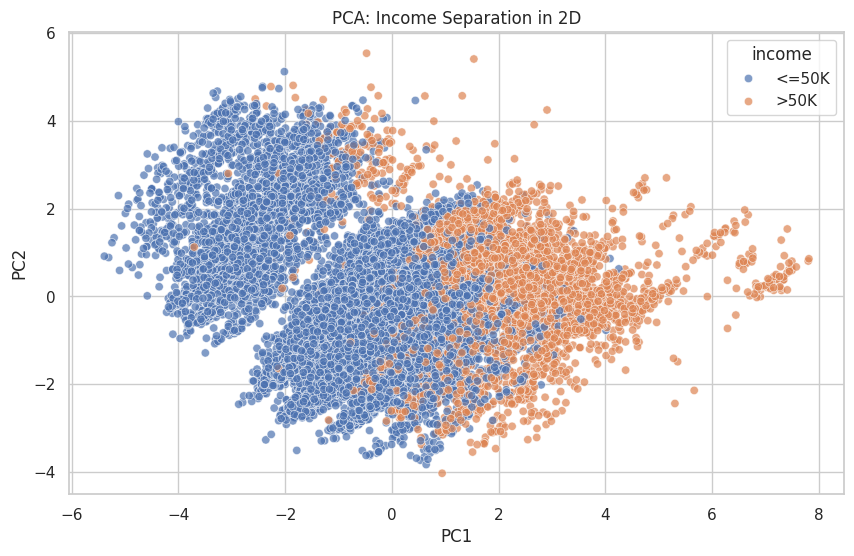

In [13]:
# ================================================================
# STEP 8: MULTIVARIATE ANALYSIS USING PCA
# ================================================================
# Standardize numeric columns
numeric_cols = df_encoded.select_dtypes(include='number').drop(columns=["income_binary"]).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded[numeric_cols])

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
df_pca["income"] = df["income"].values

# Visualize PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="income", alpha=0.7)
plt.title("PCA: Income Separation in 2D")
plt.show()


In [14]:
# ================================================================
# STEP 9: EXPORT CLEANED DATA
# ================================================================
df.to_csv("cleaned_adult_income_data.csv", index=False)
print("\nCleaned & processed data exported as 'cleaned_adult_income_data.csv'")


Cleaned & processed data exported as 'cleaned_adult_income_data.csv'
